
### Modelo Baseline - Regresión Logística con variables numéricas seleccionadas

-------------

### 🧠 Selección de variables para el modelo baseline

En esta etapa se construye un modelo baseline utilizando únicamente variables numéricas que, a simple vista, pueden tener una relación razonable con la rotación (`Attrition`). Aún no se aplican métodos de ingeniería de variables ni selección por importancia.

Las variables fueron seleccionadas por criterios como:

- Relevancia intuitiva respecto a la decisión de dejar la empresa.
- Disponibilidad y completitud en el dataset.
- Ser de tipo numérico (no requieren transformación para el baseline).

#### ✅ Variables incluidas:
- `Age`: la edad puede influir en decisiones de permanencia o cambio laboral.
- `DistanceFromHome`: empleados más alejados podrían tener menor retención.
- `Education`: el nivel educativo puede impactar expectativas y movilidad.
- `EnvironmentSatisfaction`: refleja percepción del entorno laboral.
- `JobInvolvement`: nivel de compromiso con el trabajo.
- `JobLevel`: nivel jerárquico dentro de la organización.
- `JobSatisfaction`: indicador directo de satisfacción laboral.
- `MonthlyIncome`: compensación económica como posible factor de motivación.
- `NumCompaniesWorked`: puede reflejar historial de rotación previa.
- `TotalWorkingYears`: experiencia laboral acumulada.
- `YearsAtCompany`: antigüedad específica en la empresa actual.
- `YearsWithCurrManager`: duración de la relación jefe-subordinado.

------------

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_curve


In [20]:
### Cargar dataset limpio generado en la etapa 1
df = pd.read_csv("HR_Em_Attrition_Cleaned.csv")

In [21]:
#Seleccionar solo variables numéricas que a simple vista tienen valor predictivo


features_baseline = [
    'Age', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
    'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
    'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany',
    'YearsWithCurrManager'
]
X = df[features_baseline]
y = df['Attrition']


In [22]:
#Dividir los datos en entrenamiento y prueba (70% / 30%)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)


In [23]:
# Entrenar el modelo baseline con Regresión Logística


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]


c:\Users\Ryzen 5\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
#Evaluar el modelo: Accuracy, Precision, Recall, KS

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_proba)
ks = max(abs(tpr - fpr))

print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"KS: {ks:.3f}")

Accuracy: 0.841
Precision: 0.667
Recall: 0.028
KS: 0.299


Matriz de Confusión:
[[369   1]
 [ 69   2]]


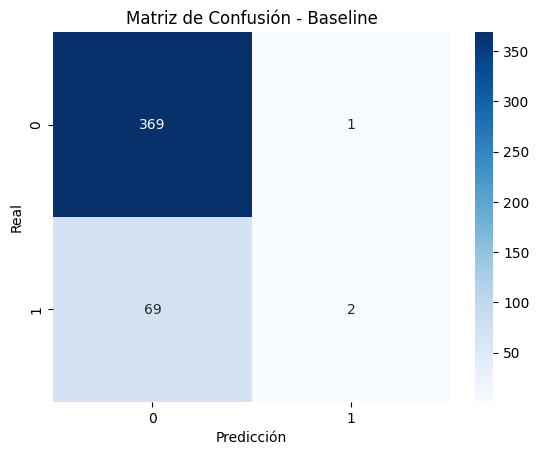

In [25]:
# ### Visualización: Matriz de Confusión

conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Baseline")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

### 📊 Interpretación de métricas del modelo baseline

- **Accuracy (0.841):** El modelo acierta en el 84.1% de los casos, pero esto se debe principalmente al fuerte desbalance de clases (la mayoría de empleados no se va).
- **Precision (0.667):** Cuando el modelo predice que alguien se va, acierta el 66.7% de las veces. Es decir, pocas predicciones positivas, pero bastante precisas.
- **Recall (0.028):** El modelo detecta solo el 2.8% de los casos reales de abandono. Está fallando al capturar la mayoría de los que sí se van.
- **KS (0.299):** Muestra una capacidad moderada de separación entre clases. Es útil como línea base que futuras versiones del modelo deben mejorar.
- **Matriz de Confusión:**
  - Verdaderos negativos: 369
  - Falsos positivos: 1
  - Falsos negativos: 69
  - Verdaderos positivos: 2

🔎 **Conclusión:** El modelo baseline es conservador: predice muy pocos abandonos, pero los que predice son en su mayoría correctos. Sin embargo, su capacidad para detectar empleados que efectivamente se irán es muy baja (recall). Esto es un punto clave a mejorar en futuras iteraciones.


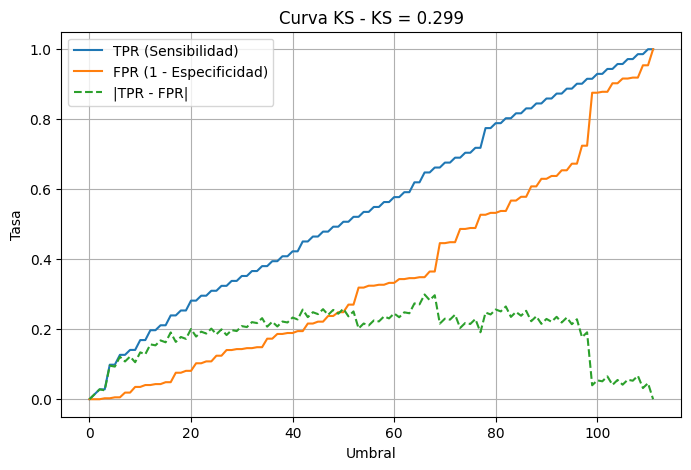

In [26]:
# ### Visualización: Curva KS


plt.figure(figsize=(8, 5))
plt.plot(tpr, label="TPR (Sensibilidad)")
plt.plot(fpr, label="FPR (1 - Especificidad)")
plt.plot(abs(tpr - fpr), label="|TPR - FPR|", linestyle="--")
plt.title(f"Curva KS - KS = {ks:.3f}")
plt.xlabel("Umbral")
plt.ylabel("Tasa")
plt.legend()
plt.grid()
plt.show()


### 📈 Interpretación de la Curva KS

La Curva KS muestra dos métricas clave a lo largo de los umbrales de decisión del modelo:

- **TPR (True Positive Rate):** proporción de positivos correctamente identificados.
- **FPR (False Positive Rate):** proporción de negativos incorrectamente clasificados como positivos.

La línea discontinua representa la **diferencia entre TPR y FPR en cada punto**.

El **valor KS** (Kolmogorov-Smirnov) es la **mayor distancia entre estas dos curvas**, e indica qué tan bien el modelo separa a los empleados que se quedan vs. los que se van.

- Un **KS más alto** = mejor capacidad de discriminación.
- En este baseline, el KS sirve como **punto de referencia** para comparar iteraciones futuras del modelo.
